# Experiment on CIFAR100 DMS

In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.transforms as transforms
import sys
import os
import argparse

import utils
import timeit

In [2]:
from models.cifar100 import mobilenetv2_skip
dic_model = {'MobileNetV2_skip': mobilenetv2_skip.MobileNetV2_skip}

args_visible_device = "0"
args_model = "MobileNetV2_skip"
args_batch_size = 1
args_dataset_path = "./data"
args_pretrained = "./checkpoint/CIFAR100-MobileNetV2_skip-76.51L-77.07H-finetuned.pth"

testloader = utils.get_testdata('CIFAR100',args_dataset_path,batch_size=args_batch_size, download=True)

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]=args_visible_device
device='cuda'

if args_model not in dic_model:
    print("The model is currently not supported")
    sys.exit()

net = dic_model[args_model](num_classes=100)
net = net.to(device)

checkpoint = torch.load(args_pretrained)
net.load_state_dict(checkpoint['net_state_dict'])

Files already downloaded and verified
[0, 1, 2, 3, 6, 9, 10, 13, 16]
[3, 6, 10, 13]
[2, 2, 2, 2]


<All keys matched successfully>

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [4]:
classes = testloader.dataset.classes
print(classes)

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
willow_tree --> maple_tree


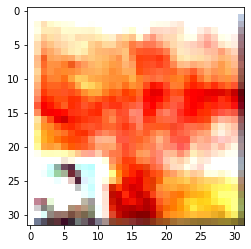

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
maple_tree --> pine_tree


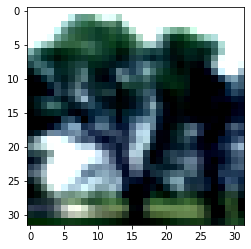

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
caterpillar --> skyscraper


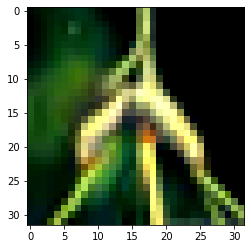

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
bear --> shrew


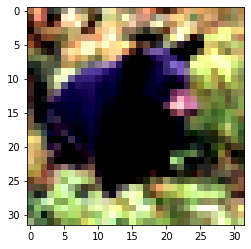

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
mushroom --> poppy


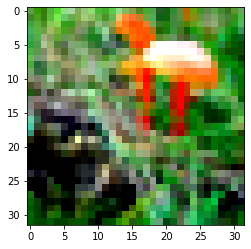

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
woman --> lizard


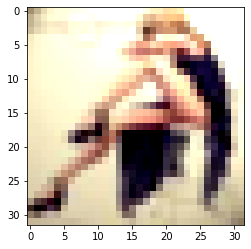

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
bee --> lion


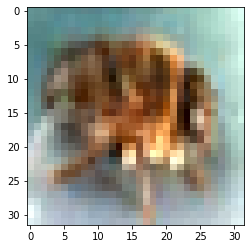

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
man --> boy


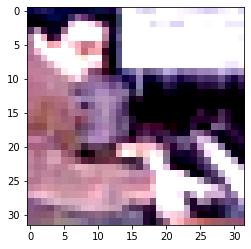

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
willow_tree --> maple_tree


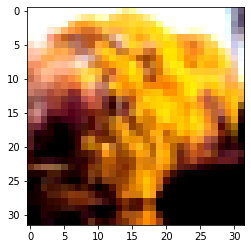

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
elephant --> cattle


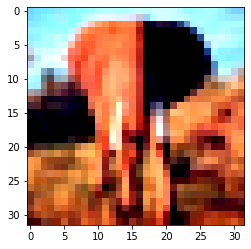

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
shark --> ray


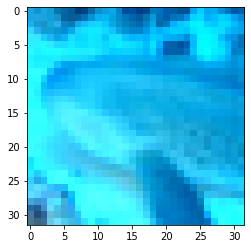

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
rabbit --> bottle


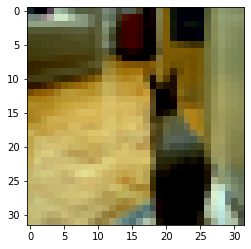

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
flatfish --> ray


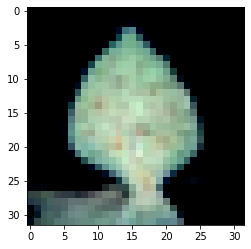

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
orchid --> man


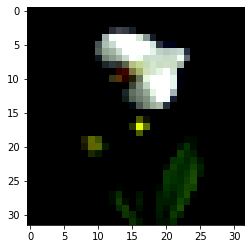

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
plate --> orange


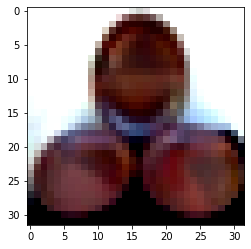

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
cockroach --> shrew


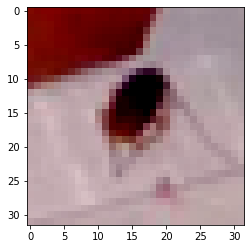

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
leopard --> kangaroo


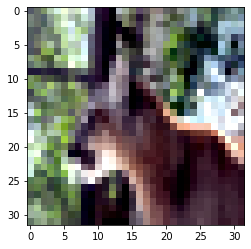

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
porcupine --> bear


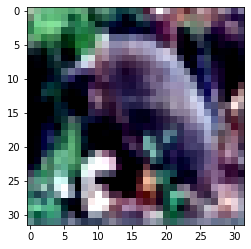

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
flatfish --> turtle


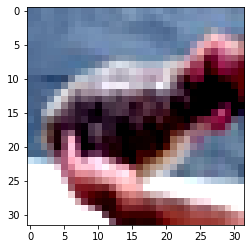

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
trout --> snail


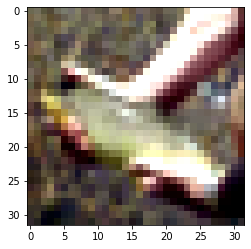

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
oak_tree --> maple_tree


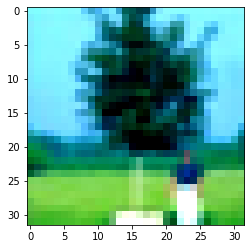

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
orchid --> snake


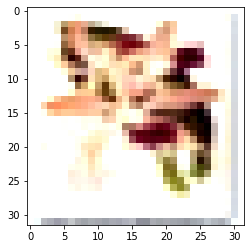

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
bear --> beaver


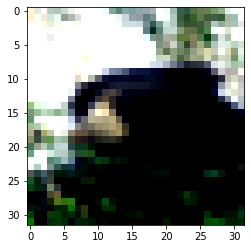

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
crocodile --> otter


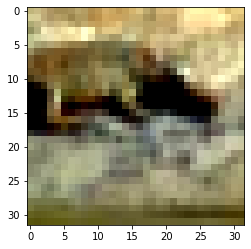

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
rabbit --> lawn_mower


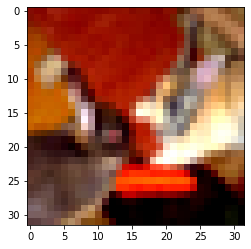

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
mouse --> hamster


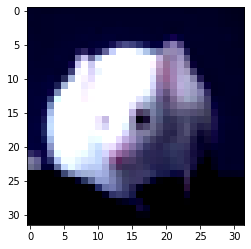

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
couch --> wardrobe


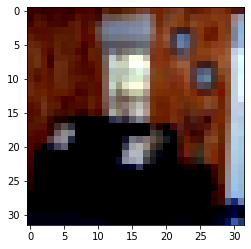

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
caterpillar --> lizard


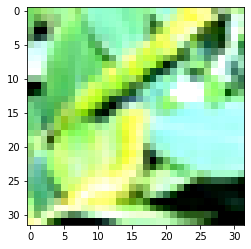

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
forest --> willow_tree


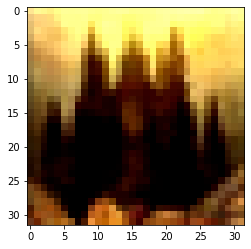

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
otter --> seal


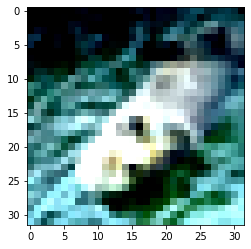

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
lamp --> cup


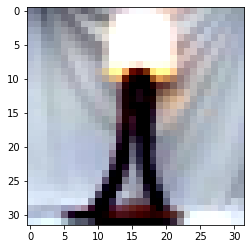

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
ray --> mushroom


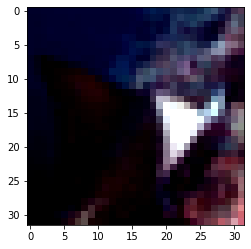

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
beetle --> crab


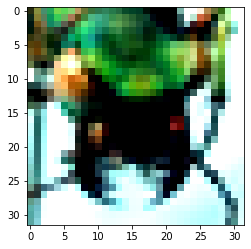

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
ray --> cloud


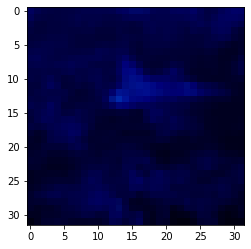

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
lamp --> cattle


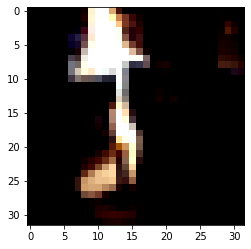

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
whale --> seal


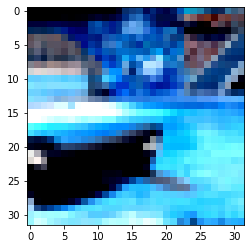

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
torch.Size([1, 5])
torch.Size([1, 5])
torch.Size([1, 1])
shrew --> mouse


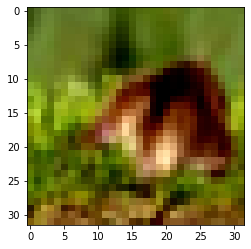

total different results: tensor(413, device='cuda:0')
Eval_Acc_top1 = 77.070
Eval_Acc_top5 = 94.170


In [21]:
net.eval()
correct_top1 = 0
correct_top5 = 0
total = 0
args_skip=True

total_diff=0

with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(testloader):
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = net(inputs, False)
        _, pred = outputs.topk(5, 1, largest=True, sorted=True)
        label_e = targets.view(targets.size(0), -1).expand_as(pred)
        correct = pred.eq(label_e).float()
        correct_top5 += correct[:, :5].sum()
        correct_top1 += correct[:, :1].sum()
        total += targets.size(0)

        outputs_skip = net(inputs, True)
        _, pred_skip = outputs_skip.topk(5, 1, largest=True, sorted=True)
        label_e = targets.view(targets.size(0), -1).expand_as(pred)
        correct_skip = pred_skip.eq(label_e).float()
        total_diff += (correct[:,:1] > correct_skip[:,:1]).sum()
        if correct[:,:1] > correct_skip[:,:1] and batch_idx % 11 ==0 :
            print(label_e.shape)
            print(pred_skip.shape)
            print(correct[:,:1].shape)
            print(classes[label_e[0,0].item()],"-->", classes[pred_skip[0,0]])
            imshow(torchvision.utils.make_grid(inputs[0].cpu()))



print("total different results:", total_diff)        
acc_top1 = 100.*correct_top1/total
acc_top5 = 100.*correct_top5/total

print("Eval_Acc_top1 = %.3f" % acc_top1)
print("Eval_Acc_top5 = %.3f" % acc_top5)
